In [1]:
# Following is the Code for comparators of two numbers (2 Qubits) provided example of Num1:(a1:1)(a2:1)=10=2 and Num2:(b1:0)(b2:1)=11=3
# problem statement it's comparing first two bits of each number but as soon as we move towards second set a2,b2 it shows zero 
# the issue is in both 2 bit comparator and 3 bit comparator

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [3]:
qr1 = QuantumRegister(4)
circuit = QuantumCircuit(qr1)

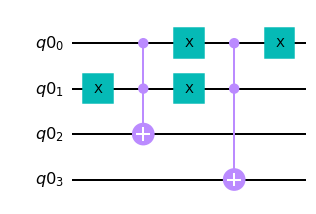

In [4]:
#  Uc 
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[2])
circuit.x(qr1[0])
circuit.x(qr1[1])
circuit.ccx(qr1[0],qr1[1],qr1[3])
circuit.x(qr1[0])
circuit.draw(output = 'mpl')

In [5]:
# Making UC circuit a gate
UC = circuit.to_gate()
type(UC)

qiskit.circuit.gate.Gate

In [6]:
com = QuantumRegister(10)
mea = ClassicalRegister(2)
circuit1 = QuantumCircuit(com,mea)

In [7]:
initial=[[1,0],[0,1]]
circuit1.initialize(initial[0], 5)
circuit1.initialize(initial[1], 0)

circuit1.initialize(initial[1], 6)
circuit1.initialize(initial[0], 1)


#circuit1.reset(com)
#####################################
# Input 1
#circuit1.x(com[0])
#circuit1.x(com[5])
# Input 2
#circuit1.x(com[1])
#circuit1.x(com[6])
#####################################
circuit1.reset(com[2])
circuit1.reset(com[3])
circuit1.reset(com[4])
circuit1.reset(com[7])
circuit1.reset(com[8])
circuit1.reset(com[9])

circuit1.append(UC,[0,1,2,3])
circuit1.append(UC,[5,6,7,8])


circuit1.x(com[2])
circuit1.x(com[3])


circuit1.ccx(com[2],com[3],com[4])
circuit1.ccx(com[8],com[4],com[3])
circuit1.ccx(com[7],com[4],com[2])

circuit1.x(com[2])
circuit1.x(com[3])

# Measuring Significant output

circuit1.measure(com[2],mea[0])
circuit1.measure(com[3],mea[1])

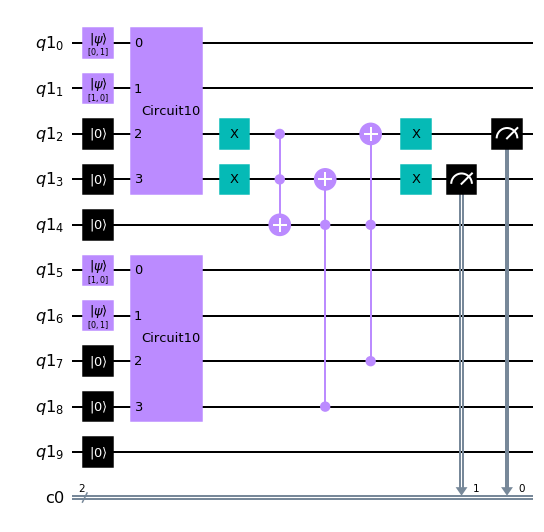

In [8]:
simulator = Aer.get_backend('statevector_simulator')
circuit1.draw(output = 'mpl')

{'01': 1}


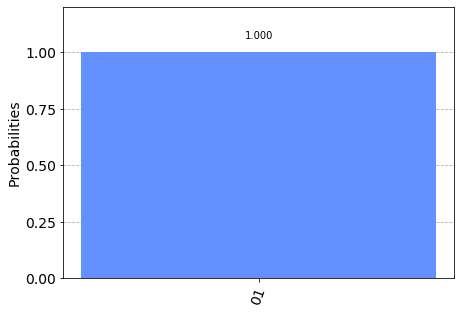

In [9]:
result = execute(circuit1, backend = simulator, shots = 1).result()
counts = result.get_counts()

#counts = counts.int_outcomes()
print(counts)
#state = result.get_statevector()
#print(state)
plot_histogram(counts)

In [10]:
# IBMQ.save_account('2a18c21d0290fdae39f5415414efdb49a4dfe503d8101a3ee4afd6e6da6ead34bf084b82f1f73c097f2be712dcbf4aadc1e0c07bae0117abf0ff16442c293b25')

# IBMQ.load_account()

# provider = IBMQ.get_provider('ibm-q')
# qcomp = provider.get_backend('ibmq_16_melbourne') 

# job = execute(circuit, backend=qcomp)
# from qiskit.tools.monitor import job_monitor 
# job_monitor(job)